<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/auto_encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [38]:
(X_train, _, ), (X_test, _) = mnist.load_data()

In [39]:
X_train.shape

(60000, 28, 28)

In [40]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

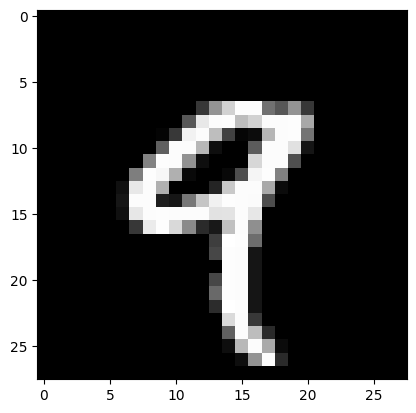

In [41]:
plt.imshow(X_train[4], cmap='gray')
plt.show()

In [42]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

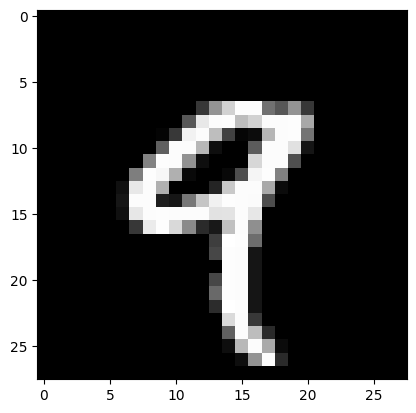

In [43]:
plt.imshow(X_train[4], cmap='gray')
plt.show()

In [44]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [45]:
x_train_noisy = X_train + 0.5 + np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + 0.5 + np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [46]:
x_train_noise = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

In [48]:
inputs = Input(shape=(784,))

encoder = Dense(32, activation='relu')(inputs)

decoder = Dense(784, activation='sigmoid')(encoder)

autoencoder = Model(inputs, decoder)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noise, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test_noisy, X_test))

Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.2924 - val_loss: 0.2608
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2518 - val_loss: 0.2407
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2314 - val_loss: 0.2210
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2155 - val_loss: 0.2096
Epoch 5/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2079 - val_loss: 0.2044
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2030 - val_loss: 0.2001
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1987 - val_loss: 0.1953
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1948 - val_loss: 0.1932
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1927 - val_loss: 0.1913
Epoch 10/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1912 - 

In [55]:
idx = np.random.randint(X_test.shape[1])

In [56]:
original_image = X_test[idx]

In [57]:
original_shape = X_test[idx]

In [58]:
noisy_image = original_shape + 0.5 + np.random.normal(loc=0.0, scale=1.0, size=original_shape.shape)

noisy_image = np.clip(noisy_image, 0.0, 1.0)

denoised_image = autoencoder.predict(np.expand_dims(noisy_image, axis=0))

denoised_image = denoised_image.reshape((28, 28))

1/1 [==============================] - 0s 23ms/step


(-0.5, 27.5, 27.5, -0.5)

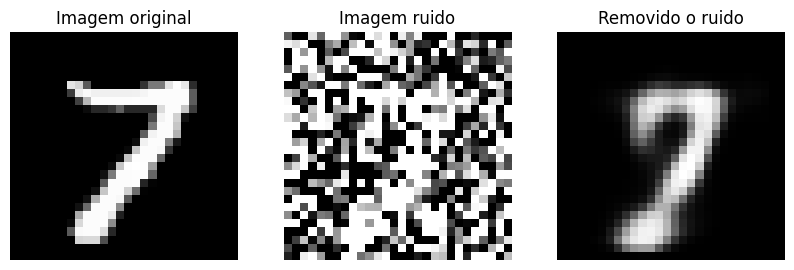

In [59]:
plt.figure(figsize=(10, 4))
plt.subplot(1,3,1)
plt.imshow(original_image.reshape(28,28), cmap="gray")
plt.title("Imagem original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(noisy_image.reshape(28,28), cmap="gray")
plt.title("Imagem ruido")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(denoised_image, cmap="gray")
plt.title("Removido o ruido")
plt.axis('off')